In [85]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv("hasil_cluster_kmeans.csv")
data.head(10)


,gender,race,parenteducation,lunch,testpreparation,cluster
0,0,0.00,0.2,1,1,1
1,1,0.75,0.0,0,0,2
2,0,1.00,0.4,0,0,4
3,0,0.25,0.2,1,0,3
4,0,1.00,0.6,1,1,1
5,1,0.75,0.2,1,0,0
6,1,0.00,0.8,1,0,0
7,0,1.00,0.4,1,1,1
8,0,0.75,0.2,1,0,3
9,0,0.50,0.4,0,0,4


In [86]:
#use cfs subset eval
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:6]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#cfs subset eval tugasnya memberi tahu fitur mana yang paling penting

             Specs        Score
5          cluster  1045.745501
4  testpreparation   440.662115
0           gender   400.542673
3            lunch   348.000000
1             race     1.066252
2  parenteducation     0.932726


In [87]:
print("Ukuran data: ", data.shape)

Ukuran data:  (1000, 6)


In [88]:
#drop parenteducation and race
data = data.drop(['parenteducation','race'], axis=1)
data.head(20)

,gender,lunch,testpreparation,cluster
0,0,1,1,1
1,1,0,0,2
2,0,0,0,4
3,0,1,0,3
4,0,1,1,1
5,1,1,0,0
6,1,1,0,0
7,0,1,1,1
8,0,1,0,3
9,0,0,0,4


In [89]:
#decision tree
import pickle
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

#make classification with Decision Tree for column 1-5
X = data.iloc[:,0:3]  #independent columns
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#get accuracy, precision, recall, f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


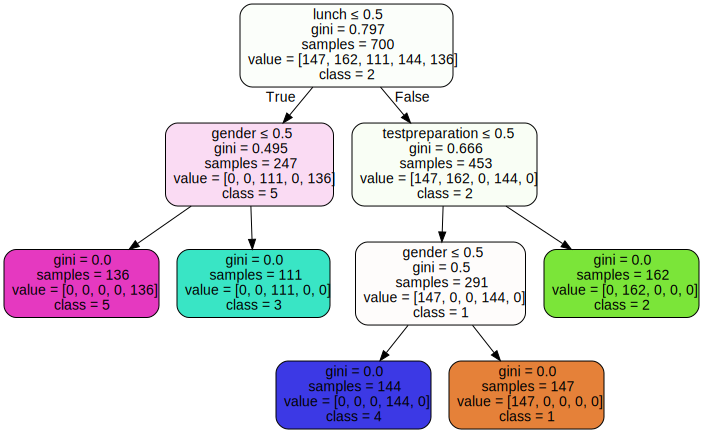

In [90]:
#print tree
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=['1','2','3','4','5'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [91]:
#save the model to disk
filename = 'student_tree.pkl'
pickle.dump(clf, open(filename, 'wb'))